In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds=pd.read_csv("kc_house_data.csv")
ds.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

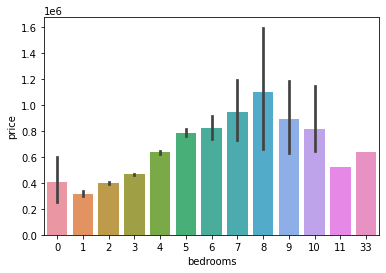

In [5]:
import pandas as pd
import seaborn as sns
ds=pd.read_csv("kc_house_data.csv")
sns.barplot(x='bedrooms',y='price',data=ds )

In [ ]:
#in the features , im gonna use bedrooms, bathrooms , floors and view.

In [6]:
from sklearn.model_selection import train_test_split
x=ds[["floors","bedrooms","bathrooms","view"]]
y=ds[["price"]].values
x_train, x_test ,y_train, y_test =train_test_split(x,y, test_size=0.35,random_state=40)
x_train, x_test ,y_train, y_test

(       floors  bedrooms  bathrooms  view
 10009     1.0         3       1.00     0
 1163      1.5         6       4.50     0
 18587     1.0         3       1.50     0
 20344     2.0         5       3.50     0
 10981     2.0         4       3.25     0
 ...       ...       ...        ...   ...
 11532     1.0         5       2.75     0
 16065     1.0         4       3.00     0
 14501     1.5         3       1.00     0
 14555     1.0         3       1.75     0
 11590     1.0         3       1.00     0
 
 [14048 rows x 4 columns],
        floors  bedrooms  bathrooms  view
 21568     2.0         4       3.50     0
 3040      2.0         4       2.50     0
 198       2.0         3       2.50     0
 16456     1.0         3       2.00     0
 19502     2.0         5       3.00     0
 ...       ...       ...        ...   ...
 7505      1.0         3       1.75     0
 12852     1.0         4       2.75     0
 7046      1.0         4       3.50     0
 9738      1.5         5       1.00     0
 1396

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:", metrics.r2_score(y_test,predicted))


MSE: 78103666630.97177
R squared: 0.37873686960582753


ValueError: x and y must be the same size

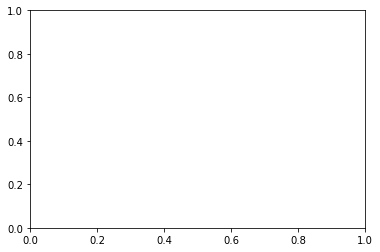

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("floors")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [11]:
x=ds[["floors","view"]]  
y=ds["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 98650549008.39114
R squared 0.21529997840391712


In [ ]:
#comparaison:
#MSE=78103666630.97177(linear model) #1
#MSE=98650549008.39114(  multi-linear regression) #2
#1 < #2
#R squared=0.21529997840391712(  multi-linear regression) #1
#R squared=0.37873686960582753(linear model) #2
#1< #2

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
lr=LinearRegression()
pf=PolynomialFeatures(degree=3)
x_train_fit = pf.fit_transform(x_train)
lr.fit(x_train_fit, y_train)
x_test_ = pf.fit_transform(x_test)
predicted = lr.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  96107826791.34009
R squared:  0.23552565579435003


In [ ]:
#comparaison:
#MSE=78103666630.97177(linear model) #1
#MSE=98650549008.39114(  multi-linear regression) #2
#MSE=96107826791.34009(Polynomial regression)#3
#1 < #3
#2 > #3
#R squared=0.21529997840391712(  multi-linear regression) #1
#R squared=0.37873686960582753(linear model) #2
#R squared=0.23552565579435003(Polynomial regression)#3
#1 < #3
#2 > #3